# Demonstration of Model Training With Full Alphabet and Digits 0-9

# 0. Import Dependencies

In [1]:
import tensorflow as tf
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt

# 1. Load In Data

In [2]:
# Relative path to the dataset using Path
dataset_path = Path.cwd().parent.parent.parent / 'data' / 'dataset_modified'

# Print the dataset path to verify
print(f"Dataset path: {dataset_path}")

# Create a dataset object with the data
data = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    image_size=(60, 40),     # Set to size of the training data (40x60)
    color_mode='grayscale',  # Load images as grayscale
    batch_size=512
)

Found 210227 files belonging to 62 classes.


In [3]:
# Define a data iterator
data_iterator = data.as_numpy_iterator()

# Get another batch from the iterator
batch = data_iterator.next()

In [4]:
# Images represented as numpy arrays
batch[0].shape

(512, 60, 40, 1)

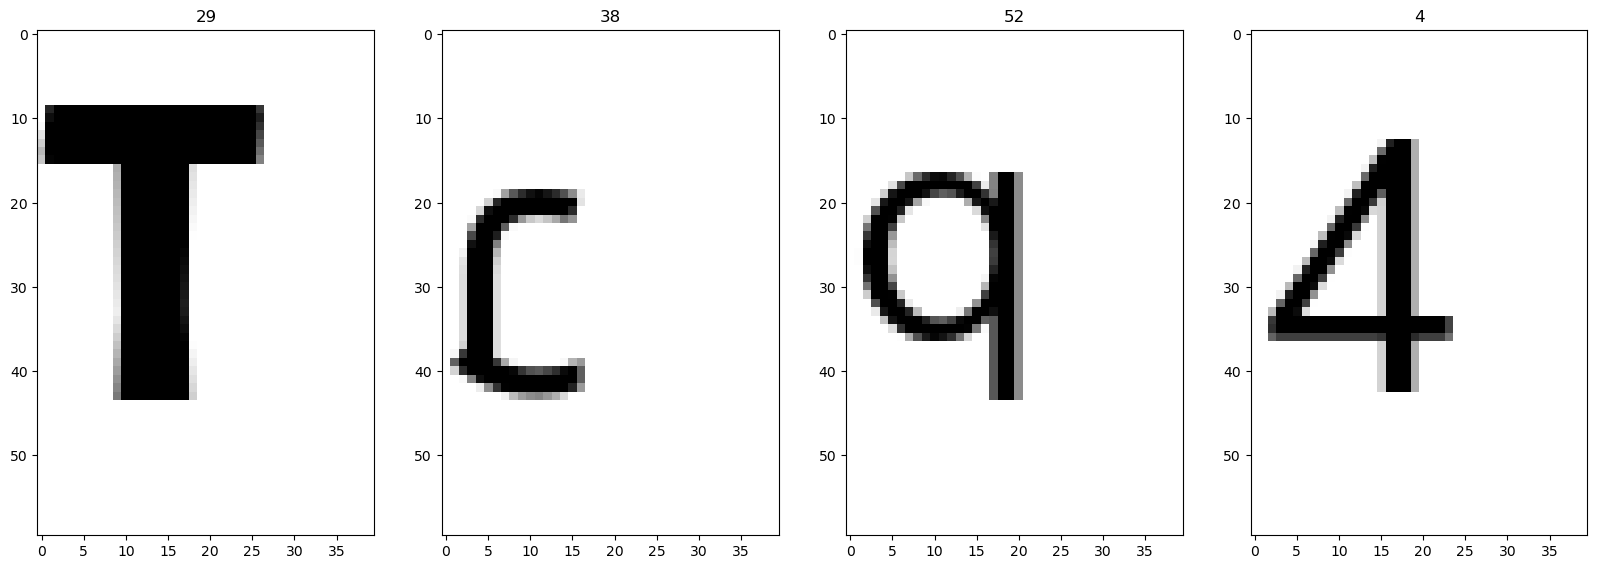

In [5]:
# Visualize batch data
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.squeeze().astype(int), cmap='gray')
    ax[idx].title.set_text(batch[1][idx])


# 2. Preprocess Data

In [6]:
# Normalize the pixel values to the range [0, 1]
data = data.map(lambda x, y: (x/255, y))

In [7]:
# Define a data iterator
data_iterator = data.as_numpy_iterator()

# Get another batch from the iterator
batch = data_iterator.next()

In [8]:
# Get a new batch from the scaled data
batch = data.as_numpy_iterator().next()

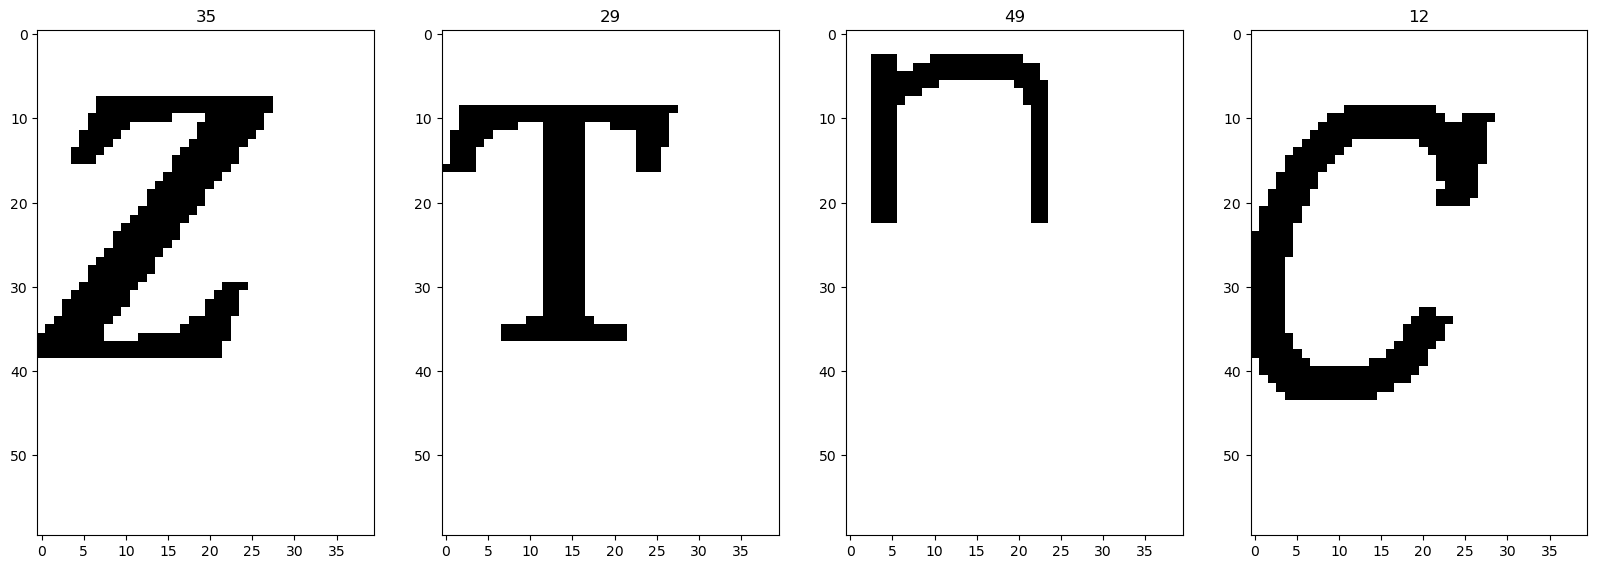

In [9]:
# Visualize new scaled data
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.squeeze().astype(int), cmap='gray')
    ax[idx].title.set_text(batch[1][idx])

### 2.1 Split Data

In [10]:
train_size = int(len(data) * .7)
val_size = int(len(data) * .2)
test_size = int(len(data) * .1)

In [11]:
train_data = data.take(train_size)
val_data = data.skip(train_size).take(val_size)
test_data = data.skip(train_size + val_size).take(test_size)

# 3. Deep Learning Model

### 3.1 Build Deep Learning Model

In [12]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation, Input
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.metrics import categorical_crossentropy

In [13]:
# Define the Model (5 Layers)
model = Sequential([
    Input(shape=(60, 40, 1)),          # Specify the input shape
    Flatten(),                         # Flatten the input image to convert the 2D image arrays into 1D vectors before passing them through dense layers   
    Dense(512, activation='relu'),     # First hidden layer
    Dense(512, activation='relu'),     # Second hidden layer
    Dense(256, activation='relu'),     # Third hidden layer
    Dense(62, activation='softmax')    # Output layer with softmax activation for multi-class classification
])

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 2400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,229,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 62)             │        15,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,639,230 (6.25 MB)

 Trainable params: 1,639,230 (6.25 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

### 3.2 Train the Model

In [16]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=150,
    verbose=2
)

Epoch 1/150
287/287 - 7s - 26ms/step - accuracy: 0.3895 - loss: 2.5675 - val_accuracy: 0.5708 - val_loss: 1.7209
Epoch 2/150
287/287 - 7s - 23ms/step - accuracy: 0.6778 - loss: 1.3062 - val_accuracy: 0.7084 - val_loss: 1.1559
Epoch 3/150
287/287 - 7s - 23ms/step - accuracy: 0.7468 - loss: 0.9982 - val_accuracy: 0.7701 - val_loss: 0.9051
Epoch 4/150
287/287 - 6s - 22ms/step - accuracy: 0.7772 - loss: 0.8673 - val_accuracy: 0.7941 - val_loss: 0.8044
Epoch 5/150
287/287 - 7s - 23ms/step - accuracy: 0.7974 - loss: 0.7781 - val_accuracy: 0.7885 - val_loss: 0.8124
Epoch 6/150
287/287 - 7s - 24ms/step - accuracy: 0.8079 - loss: 0.7316 - val_accuracy: 0.8077 - val_loss: 0.7339
Epoch 7/150
287/287 - 7s - 23ms/step - accuracy: 0.8187 - loss: 0.6850 - val_accuracy: 0.8121 - val_loss: 0.7145
Epoch 8/150
287/287 - 7s - 23ms/step - accuracy: 0.8258 - loss: 0.6482 - val_accuracy: 0.8136 - val_loss: 0.6981
Epoch 9/150
287/287 - 7s - 23ms/step - accuracy: 0.8320 - loss: 0.6233 - val_accuracy: 0.8225 - 

# 4. Visualize Training

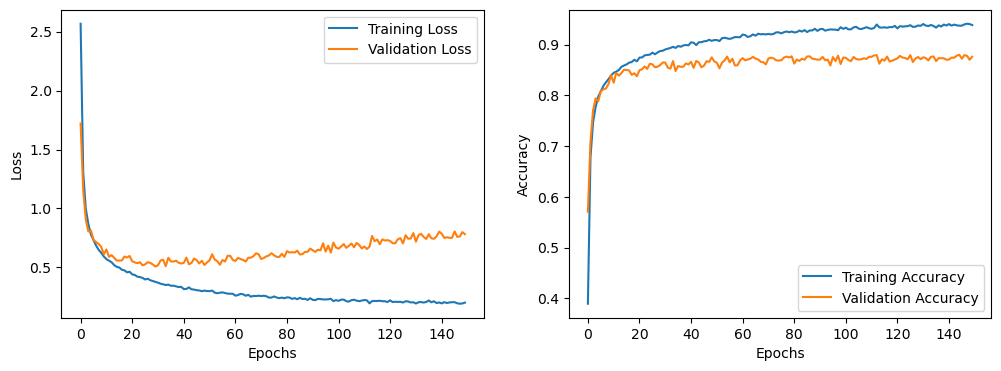

In [17]:
plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 5. Predict and Display Results

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Use the trained model for prediction
test_images = []
test_labels = []

# Prepare the test data
for image, label in test_data:
    test_images.append(image)
    test_labels.append(label)

test_images = np.concatenate(test_images)
test_labels = np.concatenate(test_labels)

2024-06-12 10:20:17.200370: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [22]:
# Make predictions
predictions = model.predict(test_images)

656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


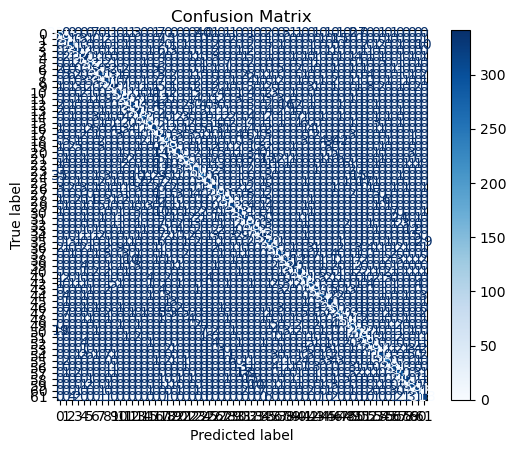

In [23]:
# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Create a confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(62))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# 6. Extract Weights and Biases

In [ ]:
import csv

weights = []
biases = []
layer_index = 1

# Relative path to the trained model using Path
trained_model_path = Path.cwd().parent / 'trained-model'

# Get weights and biases from trained model
for layer in model.layers:
    weights_and_biases = layer.get_weights()
    if weights_and_biases:
        weights.append(weights_and_biases[0])
        biases.append(weights_and_biases[1])

# Write weights to separate CSV files for each layer
for i, layer_weights in enumerate(weights):
    filename = f'{trained_model_path}\weights_layer{i+1}.csv'
    with open(filename, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerows(layer_weights)

# Write biases to separate CSV files for each layer
for i, layer_biases in enumerate(biases):
    filename = f'{trained_model_path}\\biases_layer{i+1}.csv'
    with open(filename, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(layer_biases)